The Bayesian Optimisation for 2 dimensional input data and its convergence situation to the local optimum initial samples

We are using the bell curve function as the objective function


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import simple_GP_temperature.helper_sklearn as helper
from simple_GP_temperature.bell_curve import Bellcurve
from simple_GP_temperature.non_convex_function import NonConvexFunction
from simple_GP_temperature.random_initial_2d import RandomInit2D
from simple_GP_temperature.BO_GP_temperature import BOTemperatureGP
import simple_GP_temperature.visualisation_helper as visual_helper
from simple_GP_temperature.local_optima_initial_non_convex_2d import LocalOptimaInit2DNonConvex
from tqdm import tqdm


Random Initial Sampling

In [2]:
random2d = RandomInit2D()
objective = NonConvexFunction()
initial_sample_size = 8

In [3]:
bayes_opt_random = BOTemperatureGP(evaluation_component=objective, initial_method=random2d, lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50)

In [4]:
random_mappings_lst=[]
for i in tqdm(range(30)):
    random_mappings_lst.append(bayes_opt_random.optimise())

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [04:07<00:00,  8.24s/it]


In [5]:
local_optima_init=LocalOptimaInit2DNonConvex()

In [7]:
bayes_opt_local_opt = BOTemperatureGP(evaluation_component=objective, initial_method=local_optima_init, lower_bound=[-10,-10], upper_bound=[10,10], total_iter=50)

In [8]:
local_opt_mappings_lst=[]
for i in tqdm(range(30)):
    local_opt_mappings_lst.append(bayes_opt_local_opt.optimise())

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [03:51<00:00,  7.70s/it]


In [9]:
def find_stable_point(data_dict, start_index, threshold):
     # Convert the dictionary to a list of items, sorted by the keys
     data_list = sorted(list(data_dict.items()))
     # Start from the given index
     for i in range(start_index, len(data_list)-1):
         # Calculate the difference between the current and next value
         if i+3 <= len(data_list)-1:
             difference = abs(((data_list[i][1]-data_list[i+1][1])+(data_list[i+1][1] - data_list[i+2][1])+(data_list[i+2][1]-data_list[i+3][1]))/3)
         else:
             difference = threshold+1
         # If the difference is below the threshold, return the current index
         if difference < threshold:
             return i

     # If no stable point was found, return None
     return None

In [10]:
threshold = 0.1
converge_iter_num_lst = []
for local_opt_mappings in local_opt_mappings_lst:
    converge_iter_num_lst.append(find_stable_point(local_opt_mappings, initial_sample_size, threshold))

In [11]:
converge_iter_num_lst_random = []
for random_mappings in random_mappings_lst:
    converge_iter_num_lst_random.append(find_stable_point(random_mappings, initial_sample_size, threshold))

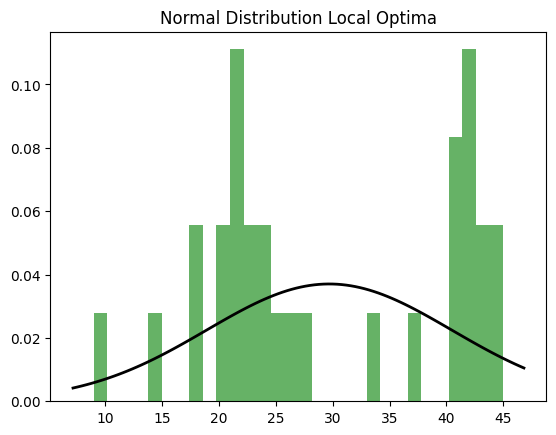

In [13]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
numbers = converge_iter_num_lst
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Local Optima")
plt.show()

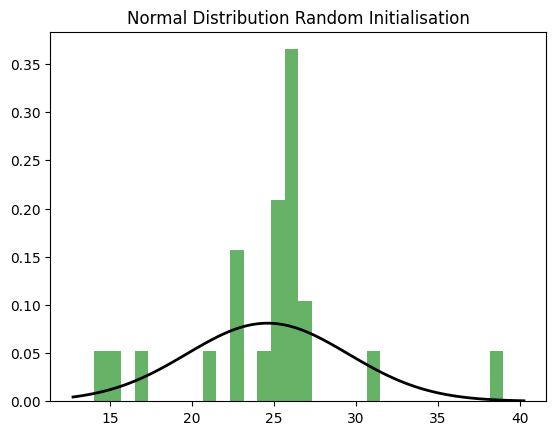

In [17]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
numbers = list(filter(None, converge_iter_num_lst_random))
plt.hist(numbers, bins=30, density=True, alpha=0.6, color='g')
 # Create a normal distribution line
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-np.power((x - np.mean(numbers)), 2) / (2 * np.std(numbers) ** 2)) / (np.sqrt(2 * np.pi) * np.std(numbers))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Normal Distribution Random Initialisation")
plt.show()